<a href="https://colab.research.google.com/github/YusufCanDemirkol/youtube-video-cover-classification/blob/main/VITmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
import os
import zipfile


from google.colab import drive
drive.mount('/content/drive')


def extract_zip(source, destination):
    with zipfile.ZipFile(source, 'r') as zip_ref:
        zip_ref.extractall(destination)


train_zip_files = [
    "/content/drive/MyDrive/data/train/belgeseltrain.zip",
    "/content/drive/MyDrive/data/train/derstrain.zip",
    "/content/drive/MyDrive/data/train/oyuntrain.zip",
    "/content/drive/MyDrive/data/train/sportrain.zip",
    "/content/drive/MyDrive/data/train/yemektrain.zip"
]


test_zip_files = [
    "/content/drive/MyDrive/data/test/belgeseltest.zip",
    "/content/drive/MyDrive/data/test/derstest.zip",
    "/content/drive/MyDrive/data/test/oyuntest.zip",
    "/content/drive/MyDrive/data/test/spor test.zip",
    "/content/drive/MyDrive/data/test/yemektest.zip"
]


for zip_file in train_zip_files:
    extract_zip(zip_file, "/content/train")

for zip_file in test_zip_files:
    extract_zip(zip_file, "/content/test")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms

# Dönüşümler
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


train_dataset = ImageFolder(root="/content/train", transform=transform)
test_dataset = ImageFolder(root="/content/test", transform=transform)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


print("Sınıflar:", train_dataset.classes)


Sınıflar: ['belgeseltrain', 'derstrain', 'oyuntrain', 'sportrain', 'yemektrain']


In [ ]:
from transformers import ViTForImageClassification

# ViT modeli
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=5,  # Projenin sınıf sayısı
    ignore_mismatched_sizes=True  # Boyut uyumsuzluğunu yok say
)
model.to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # Sınıflandırma kaybı
optimizer = optim.Adam(model.parameters(), lr=1e-4)  # Adam optimizasyonu


Epoch 1/10, Training Loss: 0.2534, Validation Loss: 0.1661, Time: 208.94 seconds
Epoch 2/10, Training Loss: 0.0556, Validation Loss: 0.1470, Time: 207.87 seconds
Epoch 3/10, Training Loss: 0.0267, Validation Loss: 0.1594, Time: 208.25 seconds
Epoch 4/10, Training Loss: 0.0261, Validation Loss: 0.1646, Time: 207.97 seconds
Epoch 5/10, Training Loss: 0.0238, Validation Loss: 0.1982, Time: 208.04 seconds
Epoch 6/10, Training Loss: 0.0156, Validation Loss: 0.1962, Time: 207.65 seconds
Epoch 7/10, Training Loss: 0.0102, Validation Loss: 0.2047, Time: 207.76 seconds
Epoch 8/10, Training Loss: 0.0141, Validation Loss: 0.2213, Time: 207.75 seconds
Epoch 9/10, Training Loss: 0.0263, Validation Loss: 0.1787, Time: 207.01 seconds
Epoch 10/10, Training Loss: 0.0140, Validation Loss: 0.2096, Time: 207.53 seconds


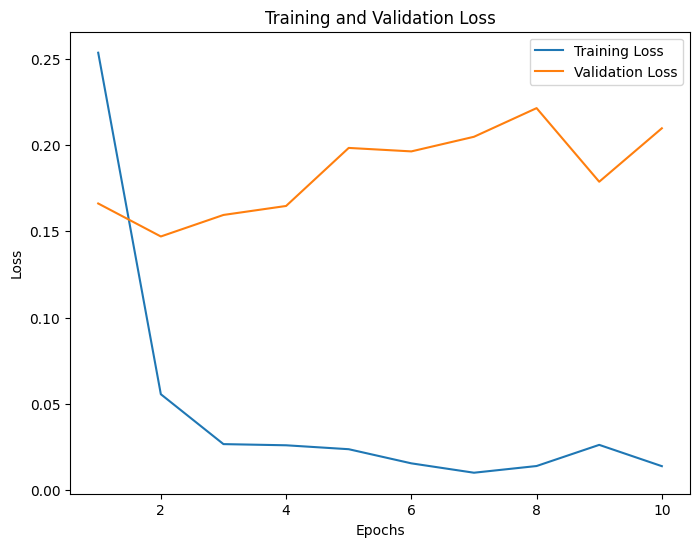

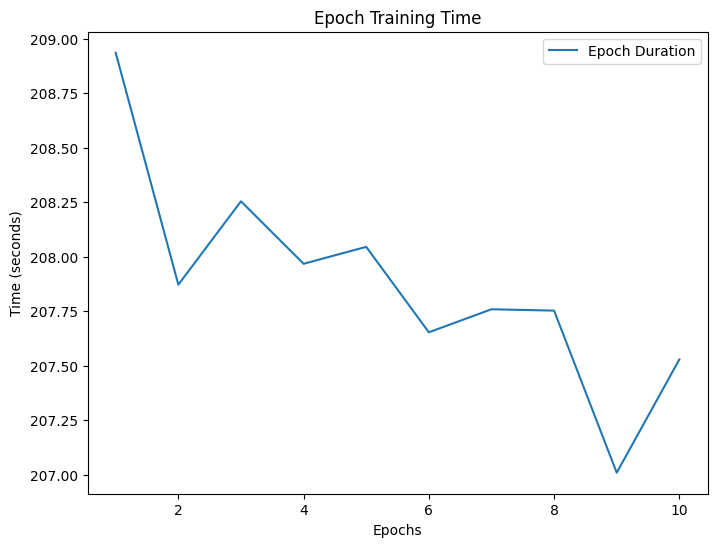

In [ ]:
import time
import matplotlib.pyplot as plt


train_losses = []
val_losses = []
epoch_durations = []

epochs = 10

for epoch in range(epochs):
    start_time = time.time()

    model.train()
    running_loss = 0.0


    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)


    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(test_loader)
    val_losses.append(val_loss)


    epoch_duration = time.time() - start_time
    epoch_durations.append(epoch_duration)


    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Time: {epoch_duration:.2f} seconds")


plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss")
plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), epoch_durations, label="Epoch Duration")
plt.xlabel("Epochs")
plt.ylabel("Time (seconds)")
plt.legend()
plt.title("Epoch Training Time")
plt.show()



In [ ]:
import torch

# Modeli kaydet
torch.save(model.state_dict(), "/content/drive/MyDrive/vit_finetuned.pth")
print("Model başarıyla kaydedildi!")


Model başarıyla kaydedildi!


               precision    recall  f1-score   support

belgeseltrain       0.97      1.00      0.98      1103
    derstrain       0.99      0.98      0.98      1016
    oyuntrain       0.93      0.86      0.90      1334
    sportrain       0.86      0.91      0.89      1022
   yemektrain       1.00      1.00      1.00      1370

     accuracy                           0.95      5845
    macro avg       0.95      0.95      0.95      5845
 weighted avg       0.95      0.95      0.95      5845



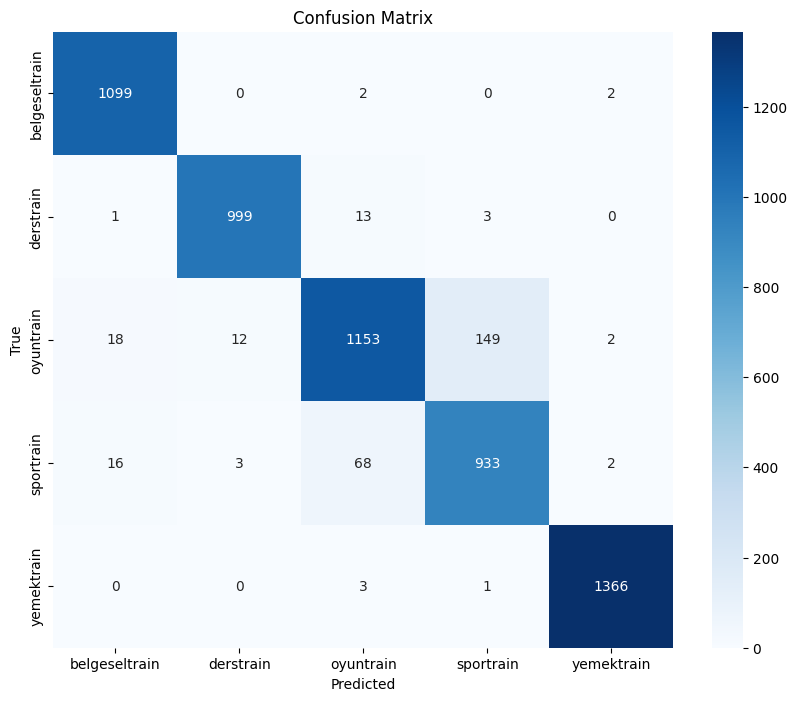

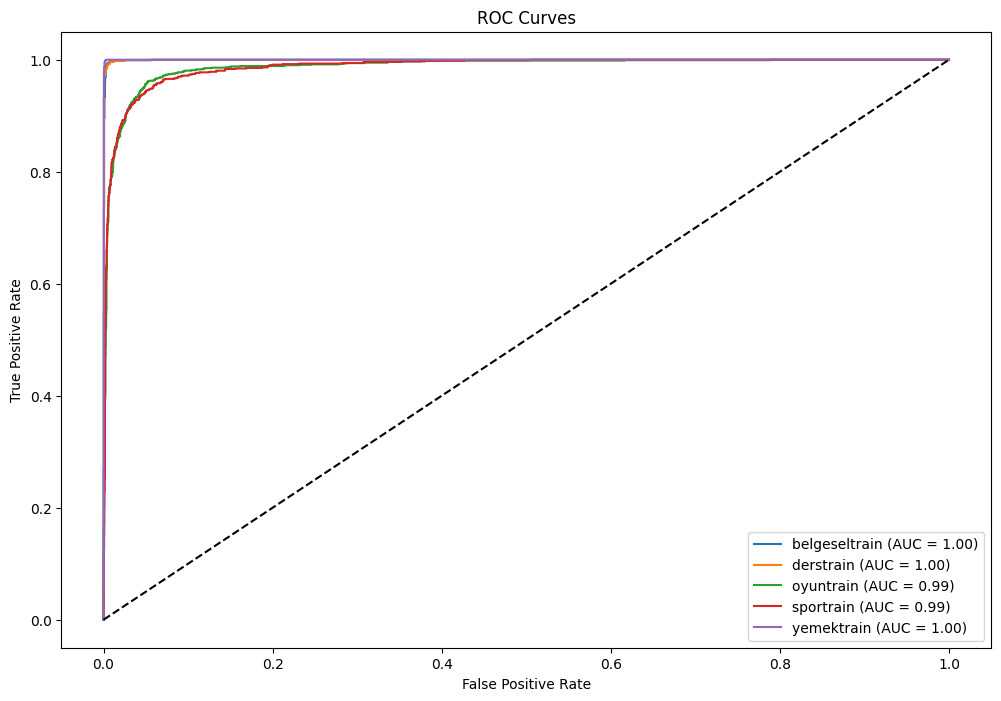

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

model.eval()

all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images).logits
        probs = torch.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())


print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))


cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


num_classes = len(train_dataset.classes)
y_true = label_binarize(all_labels, classes=range(num_classes))
all_probs = np.array(all_probs)

plt.figure(figsize=(12, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{train_dataset.classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np


accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")


recall = recall_score(all_labels, all_preds, average='macro')
precision = precision_score(all_labels, all_preds, average='macro')
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Precision: {precision:.4f}")


cm = confusion_matrix(all_labels, all_preds)
specificity = []
for i in range(len(cm)):
    tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
    fp = np.sum(cm[:, i]) - cm[i, i]
    specificity.append(tn / (tn + fp))
specificity_mean = float(np.mean(specificity))
print(f"Specificity: {specificity_mean:.4f}")


f1 = f1_score(all_labels, all_preds, average='macro')
print(f"F1-Score: {f1:.4f}")


all_labels_bin = label_binarize(all_labels, classes=range(len(train_dataset.classes)))
all_preds_bin = label_binarize(all_preds, classes=range(len(train_dataset.classes)))
auc = roc_auc_score(all_labels_bin, all_preds_bin, average='macro', multi_class="ovr")
print(f"AUC: {auc:.4f}")


Accuracy: 0.9495
Recall (Sensitivity): 0.9508
Precision: 0.9479
Specificity: 0.9875
F1-Score: 0.9489
AUC: 0.9691


In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/vit_finetuned.pth"))
model.to(device)
print("Model başarıyla yüklendi!")

<ipython-input-8-3766d0669e6a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/content/drive/MyDrive/vit_finetuned.pth"))


Model başarıyla yüklendi!


In [ ]:
model.eval()



ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTSdpaAttention(
            (attention): ViTSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fe

In [ ]:
import time
import torch


model.eval()


inference_start_time = time.time()


all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model(images).logits
        _, preds = torch.max(outputs, 1)


        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


inference_end_time = time.time()


inference_time = inference_end_time - inference_start_time
print(f"Inference Time: {inference_time:.2f} seconds")


num_samples = len(all_labels)
print(f"Number of Samples: {num_samples}")
print(f"Inference Time per Sample: {inference_time / num_samples:.6f} seconds")


Inference Time: 20.20 seconds
Number of Samples: 5845
Inference Time per Sample: 0.003457 seconds
